# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## Step 1: 문제 정의 및 가설 설정하기

*문제 정의   
    *온라인 학습 플랫폼 사용자들의 행동 패턴을 분석하여 누가 서비스 구독을 연장할지 예측합니다. 
       주요 질문은 다음과 같습니다:   

    *어떤 행동 패턴이 서비스 구독 연장에 영향을 미치는가?   
    *유저들의 학습 습관, 선호도, 이용 행태는 어떻게 구독 결정에 영향을 미치는가?   
   
*가설 설정   
    -가설 1: 월간 활동적인 학습 일수가 많은 사용자일수록 구독을 연장할 가능성이 높다.   
    -가설 2: 커뮤니티 참여도가 높은 사용자일수록 구독을 연장할 가능성이 높다.   
    -가설 3: 구독 유형과 구독 연장 여부는 상관관계가 있다.   
    -가설 4: 최근 학습 성취도가 높은 사용자일수록 구독을 연장할 가능성이 높다.   
    -가설 5: 결제 패턴이 규칙적인 사용자일수록 구독을 연장할 가능성이 높다.   


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import folium
from folium.plugins import MarkerCluster

In [21]:
# # DATA 분석 기본 세팅
# 1. 데이터 불러오기
# 2. 데이터 확인
# 3. 데이터 기본 정보 확인
# 4. 데이터 통계 요약 확인

In [7]:
data = pd.read_csv('data/mini.csv')

In [9]:
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [141]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [101]:
# 2. 결측치 및 데이터 전처리

In [143]:
# 결측치 확인
print(data.isnull().sum())

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64


In [147]:
print(data.columns)

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       'target'],
      dtype='object')


In [149]:
print(data.dtypes)

user_id                               object
subscription_duration                  int64
recent_login_time                      int64
average_login_time                   float64
average_time_per_learning_session    float64
monthly_active_learning_days           int64
total_completed_courses                int64
recent_learning_achievement          float64
abandoned_learning_sessions            int64
community_engagement_level             int64
preferred_difficulty_level            object
subscription_type                     object
customer_inquiry_history               int64
payment_pattern                        int64
target                                 int64
dtype: object


In [119]:
data['recent_login_time'] = pd.to_datetime(data['recent_login_time'], format='%Y-%m-%dT%H:%M:%S.%f')

print(type(data['recent_login_time'][0]))
data.tail(5)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,1970-01-01 00:00:00.000000029,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,1970-01-01 00:00:00.000000011,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,1970-01-01 00:00:00.000000027,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,1970-01-01 00:00:00.000000007,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,1970-01-01 00:00:00.000000005,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


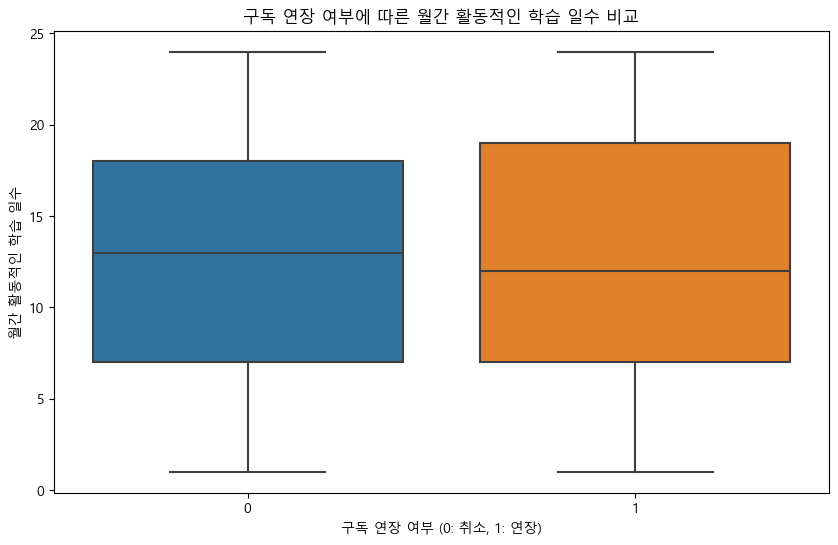

In [60]:
# 구독 연장 여부에 따른 월간 활동적인 학습 일수 비교
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='monthly_active_learning_days', data=data)
plt.title('구독 연장 여부에 따른 월간 활동적인 학습 일수 비교')
plt.xlabel('구독 연장 여부 (0: 취소, 1: 연장)')
plt.ylabel('월간 활동적인 학습 일수')
plt.show()

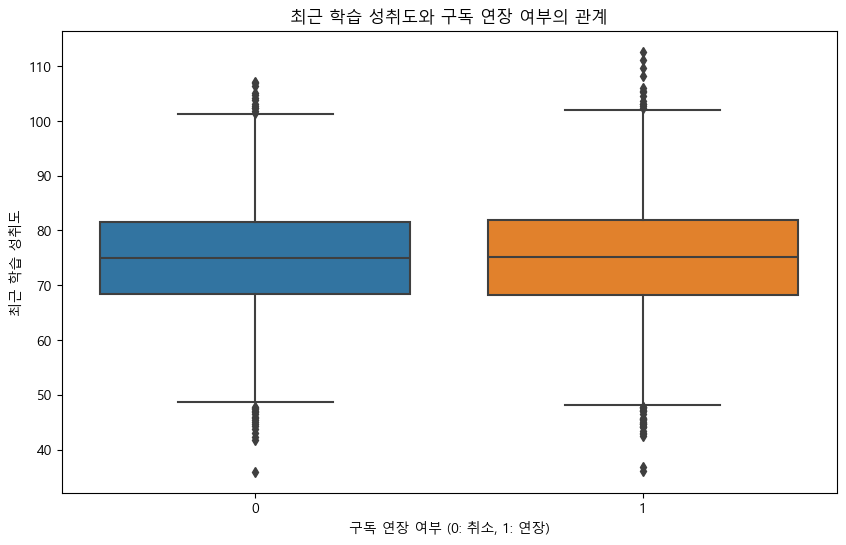

In [62]:
# 최근 학습 성취도와 구독 연장 여부의 관계 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='recent_learning_achievement', data=data)
plt.title('최근 학습 성취도와 구독 연장 여부의 관계')
plt.xlabel('구독 연장 여부 (0: 취소, 1: 연장)')
plt.ylabel('최근 학습 성취도')
plt.show()

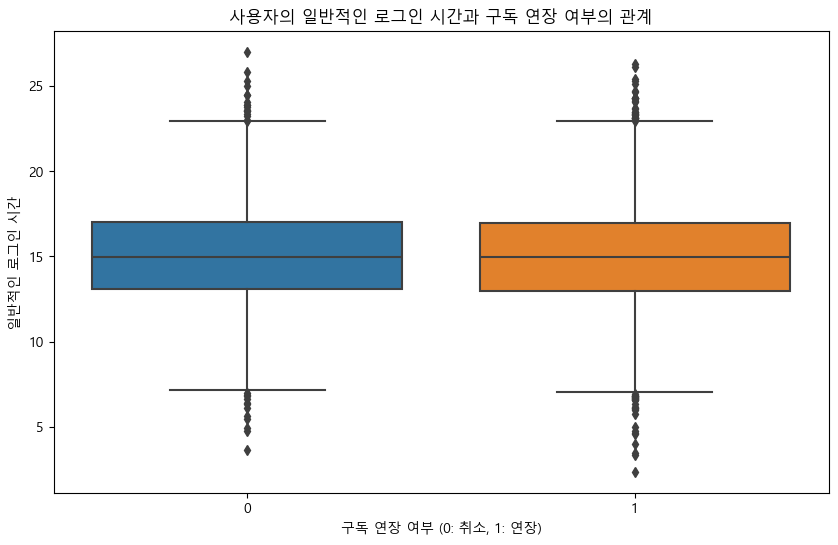

In [64]:
# 사용자의 일반적인 로그인 시간과 구독 연장 여부의 관계 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='average_login_time', data=data)
plt.title('사용자의 일반적인 로그인 시간과 구독 연장 여부의 관계')
plt.xlabel('구독 연장 여부 (0: 취소, 1: 연장)')
plt.ylabel('일반적인 로그인 시간')
plt.show()

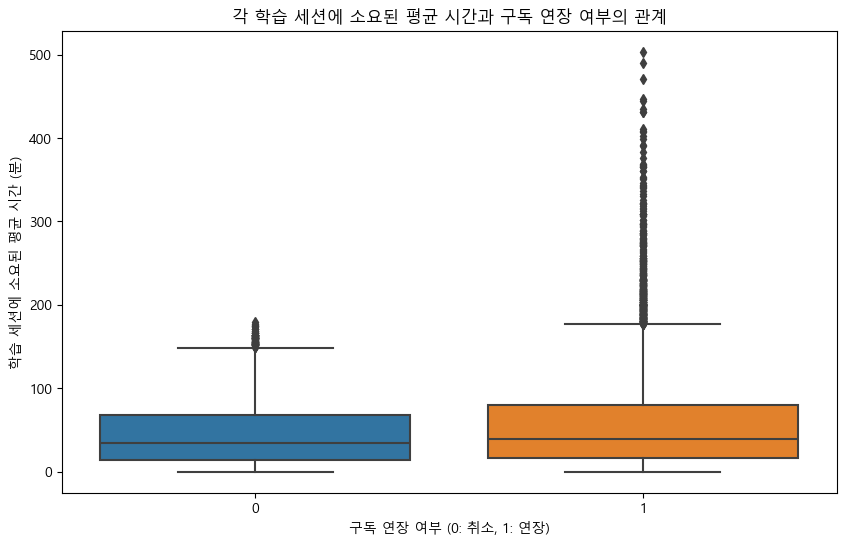

In [66]:
# 각 학습 세션에 소요된 평균 시간과 구독 연장 여부의 관계 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='average_time_per_learning_session', data=data)
plt.title('각 학습 세션에 소요된 평균 시간과 구독 연장 여부의 관계')
plt.xlabel('구독 연장 여부 (0: 취소, 1: 연장)')
plt.ylabel('학습 세션에 소요된 평균 시간 (분)')
plt.show()

C:\Users\S.PARK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


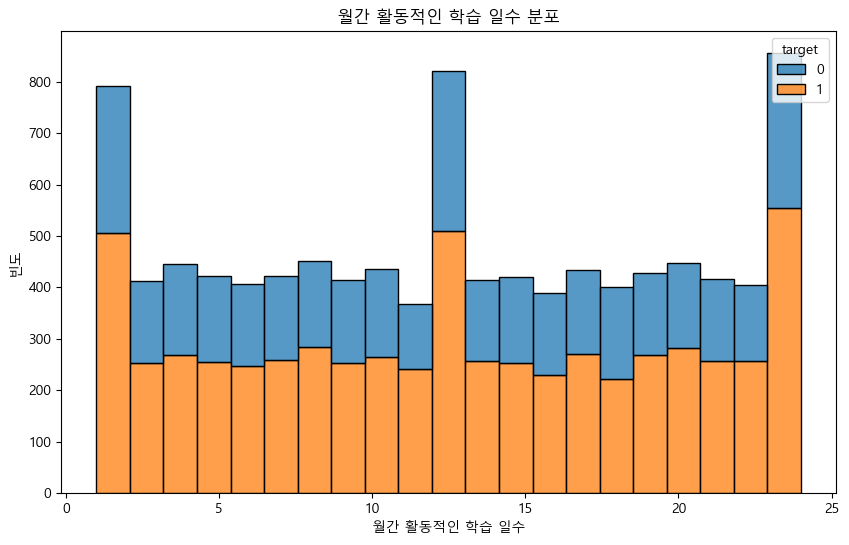

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='monthly_active_learning_days', hue='target', multiple='stack')
plt.title('월간 활동적인 학습 일수 분포')
plt.xlabel('월간 활동적인 학습 일수')
plt.ylabel('빈도')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

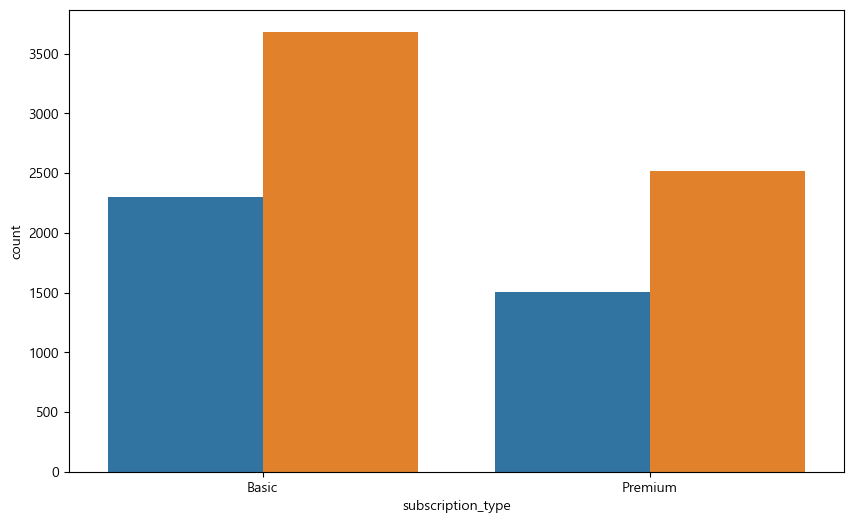

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subscription_type', hue='target', data=data)
plt.title('구독 유형별 분포')
plt.xlabel('구독 유형')
plt.ylabel('빈도')
plt.show()

In [13]:
# 구독 연장 여부에 따른 기본 통계
print(data.groupby('target').mean())

# 구독 연장 여부에 따른 데이터 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='target', data=data)
plt.title('Subscription Continuation Distribution')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]